In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<Figure size 720x432 with 0 Axes>

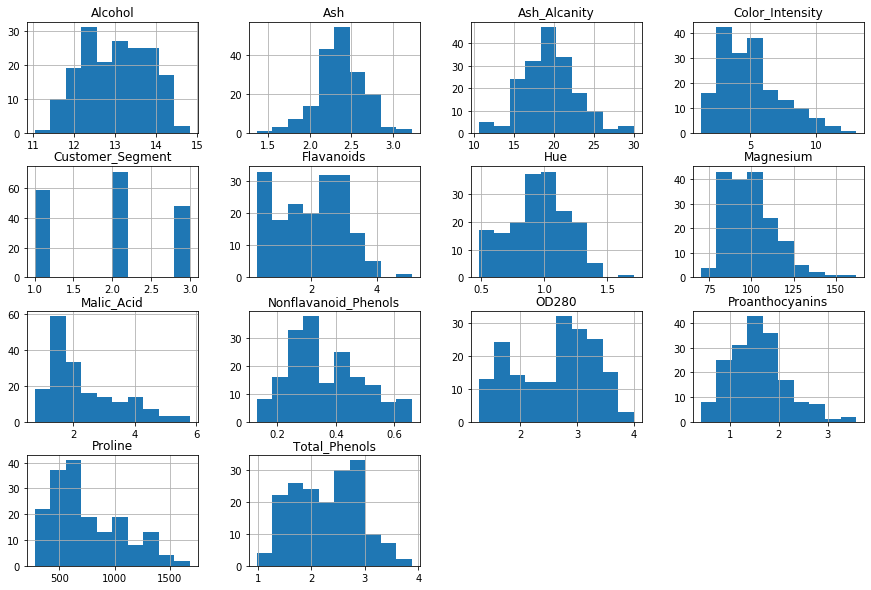

In [6]:
data.hist(figsize=(15,10))
plt.show()

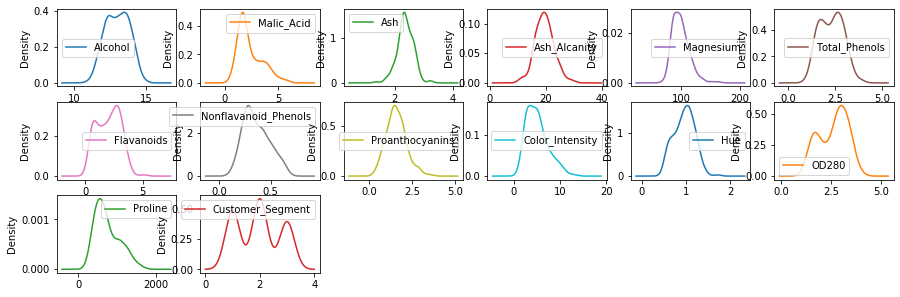

In [10]:
data.plot(kind='density',layout=(6,6),subplots=True,sharex=False,figsize=(15,10))
plt.show()

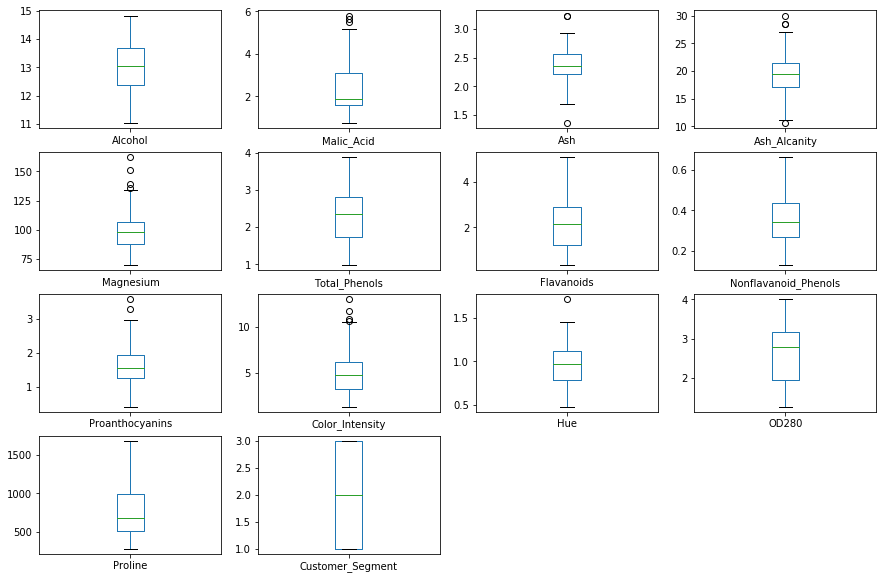

In [14]:
data.plot(kind='box',layout=(4,4),subplots=True,sharex=False,sharey=False,figsize=(15,10))
plt.show()

In [47]:
pd.set_option('display.width',100)
pd.set_option('precision',2)
correlations = data.corr(method='pearson')

In [48]:
print(correlations)

                      Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
Alcohol                  1.00        0.09  2.12e-01         -0.31       0.27           0.29   
Malic_Acid               0.09        1.00  1.64e-01          0.29      -0.05          -0.34   
Ash                      0.21        0.16  1.00e+00          0.44       0.29           0.13   
Ash_Alcanity            -0.31        0.29  4.43e-01          1.00      -0.08          -0.32   
Magnesium                0.27       -0.05  2.87e-01         -0.08       1.00           0.21   
Total_Phenols            0.29       -0.34  1.29e-01         -0.32       0.21           1.00   
Flavanoids               0.24       -0.41  1.15e-01         -0.35       0.20           0.86   
Nonflavanoid_Phenols    -0.16        0.29  1.86e-01          0.36      -0.26          -0.45   
Proanthocyanins          0.14       -0.22  9.65e-03         -0.20       0.24           0.61   
Color_Intensity          0.55        0.25  2.59e-0

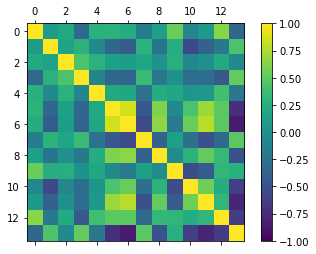

In [34]:
#plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

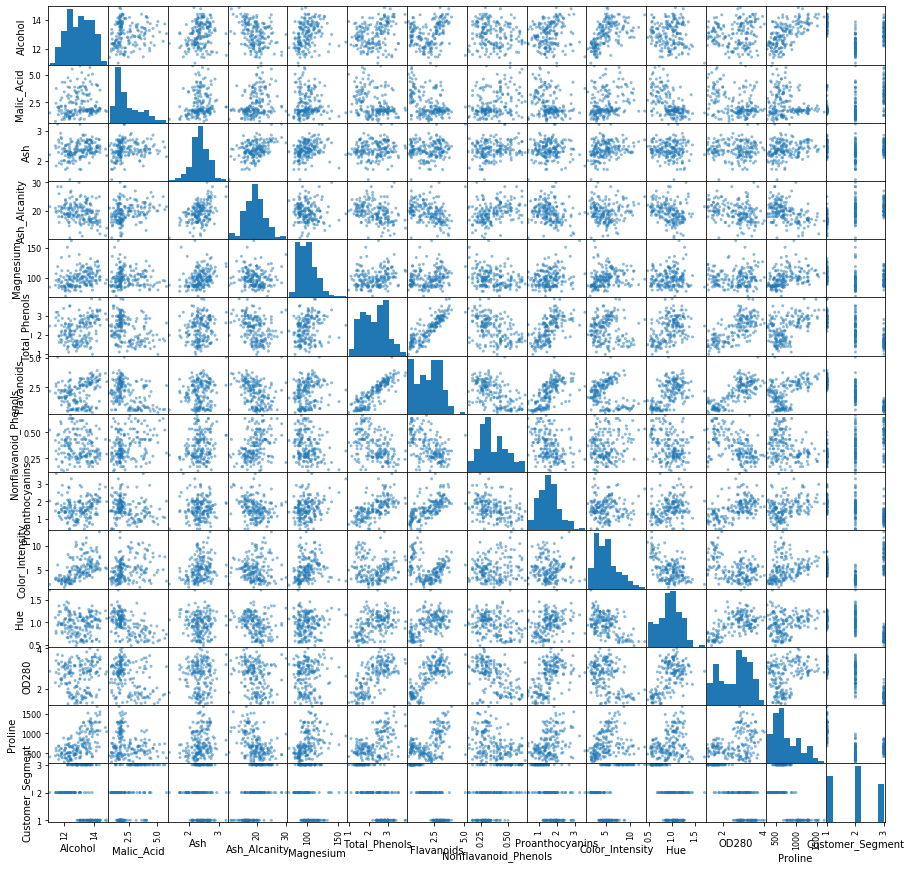

In [37]:
pd.plotting.scatter_matrix(data, figsize=(15,15))
plt.show()

In [49]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic_Acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Ash_Alcanity,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total_Phenols,178.0,2.30,0.63,0.98,1.74,2.35,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid_Phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58
Color_Intensity,178.0,5.06,2.32,1.28,3.22,4.69,6.20,13.00


In [55]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

# # feature extraction with SelectKBest

In [57]:
from sklearn.feature_selection import SelectKBest,chi2
features = SelectKBest(score_func=chi2, k=7)
model = features.fit(X,Y)

In [58]:
np.set_printoptions(precision=3)
print(model.scores_)

[ 9.454  8.119  0.935  3.32   1.641  9.402 16.051  5.346  3.981 12.453
  8.449 16.678 18.792]


In [64]:
f = model.transform(X)
print(f[0:5,:])

[[0.842 0.628 0.574 0.372 0.455 0.971 0.561]
 [0.571 0.576 0.511 0.265 0.463 0.78  0.551]
 [0.561 0.628 0.612 0.375 0.447 0.696 0.647]
 [0.879 0.99  0.665 0.556 0.309 0.799 0.857]
 [0.582 0.628 0.496 0.259 0.455 0.608 0.326]]


In [70]:
print(model.get_support())

[ True False False False False  True  True False False  True  True  True
  True]


# # Feature Extraction with Recursive Feature Elimination (RFE)

In [83]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [84]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,7)
clf = rfe.fit(X,Y)

C:\Users\uditk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [86]:
print("Num Features: %d" %clf.n_features_)
print("Selected Features: %s" %clf.support_)
print("Feature Ranking: %s" %clf.ranking_)

Num Features: 7
Selected Features: [ True False False  True False False  True False False  True  True  True
  True]
Feature Ranking: [1 4 2 1 7 3 1 6 5 1 1 1 1]


# # Principal Component Analysis

In [98]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [99]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X = StandardScaler().fit_transform(X)
# X = MinMaxScaler().fit_transform(X)

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
model = pca.fit(X)

In [101]:
print("Explained Variance: %s" % model.explained_variance_ratio_)
print(model.components_)

Explained Variance: [0.362 0.192 0.111 0.071]
[[ 0.144 -0.245 -0.002 -0.239  0.142  0.395  0.423 -0.299  0.313 -0.089
   0.297  0.376  0.287]
 [-0.484 -0.225 -0.316  0.011 -0.3   -0.065  0.003 -0.029 -0.039 -0.53
   0.279  0.164 -0.365]
 [-0.207  0.089  0.626  0.612  0.131  0.146  0.151  0.17   0.149 -0.137
   0.085  0.166 -0.127]
 [-0.018  0.537 -0.214  0.061 -0.352  0.198  0.152 -0.203  0.399  0.066
  -0.428  0.184 -0.232]]


# # Feature Importance

In [112]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.137 0.045 0.027 0.033 0.033 0.073 0.153 0.026 0.03  0.125 0.071 0.108
 0.139]


# # K-fold Cross Validation

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [118]:
kfold = KFold(n_splits=10,random_state=42)
model = LogisticRegression()
print(kfold)
score = cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

KFold(n_splits=10, random_state=42, shuffle=False)
Accuracy: 92.778% (8.625%)


# # Leave One Out Cross Validation

In [119]:
from sklearn.model_selection import LeaveOneOut

In [120]:
loocv = LeaveOneOut()
model = LogisticRegression()
score = cross_val_score(model,X,Y,cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

Accuracy: 96.067% (19.437%)


# # Repeated Random Test-Train Splits

In [121]:
from sklearn.model_selection import ShuffleSplit

In [122]:
kfold = ShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
model = LogisticRegression()
score = cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

Accuracy: 96.667% (2.079%)
